In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [3]:
train_set =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'] 
train_set.columns = col_labels 

In [4]:
test_set= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',skiprows=1 ,header = None) 
test_set.columns = col_labels

In [5]:
train_set.shape

(32561, 15)

In [6]:
test_set.shape

(16281, 15)

In [7]:
df=pd.concat([train_set,test_set],axis=0)

In [8]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
#Discretized a gross income into two ranges with threshold 50,000.
df['Income'] = df['income'].apply(lambda x: 1 if x==' >50K' else 0)
df.drop('income',axis=1,inplace=True)

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
Income            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
Income            48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 6.0+ MB


In [12]:
#we see 8 columns as categorical so label encoding it
col_in_category=['workclass','education','marital_status','occupation','relationship','race','sex','native_country']

for col in col_in_category:
    label=LabelEncoder()
    df[col]=label.fit_transform(df[col])

C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * 

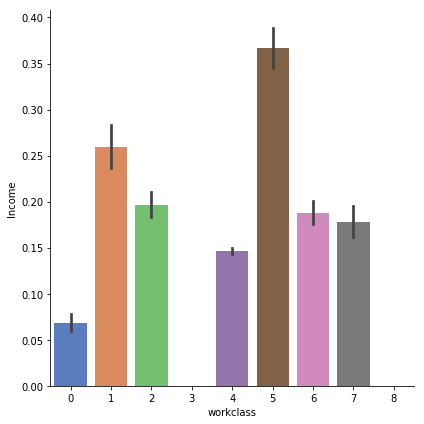

In [13]:
sns.factorplot(x="workclass", y="Income", data=df, kind="bar", size = 6, 
palette = "muted")

In [14]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


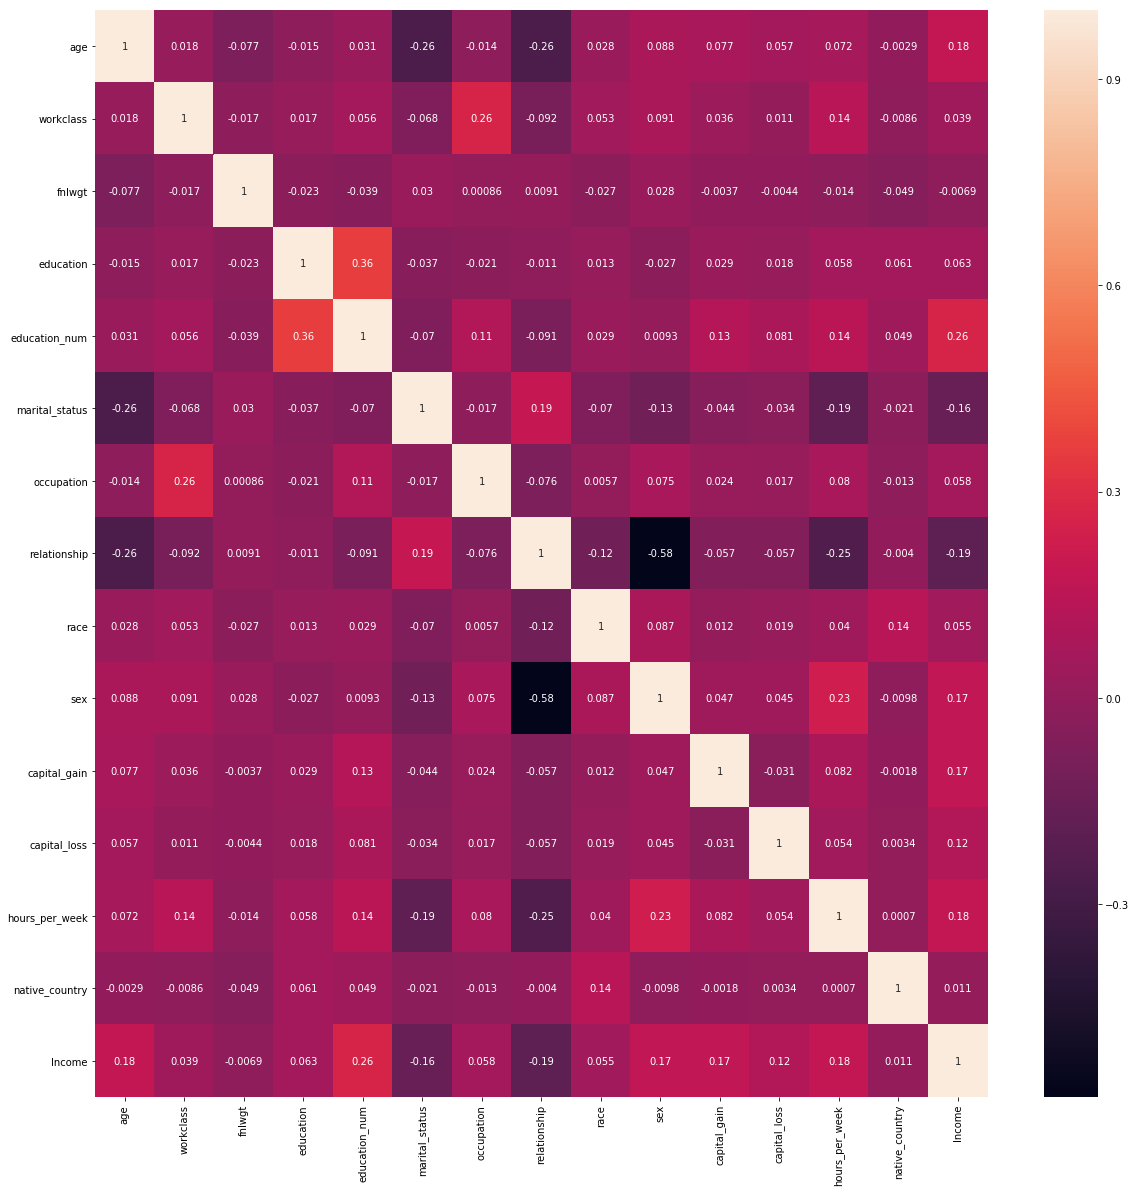

In [15]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)

In [14]:
Y=np.array(df['Income'])
X=np.array(df.drop(['Income'],1))

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()
X=sc.fit_transform(X)

C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\shurastogi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

In [23]:
models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','XGB','KNN','SVM_linear','SVM_RBF']

models.append((LogisticRegression(solver='lbfgs',max_iter=1000)))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier(max_iter=500)))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((xgb.XGBClassifier()))
models.append((KNeighborsClassifier()))
models.append((SVC(kernel='linear',gamma=0.20)))
models.append((SVC(kernel='rbf',gamma=0.20)))

In [24]:
kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_test)
    acc_score = accuracy_score(y_test,prediction)     
    print ('*'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

****************************************
LR: 0.8444844812054705
****************************************
Random Forest: 0.8498075505691589
****************************************
Neural Network: 0.8534108590615019
****************************************
GaussianNB: 0.8399803455900418
****************************************
DecisionTreeClassifier: 0.807714355908607
****************************************
XGB: 0.8596347555482762
****************************************
KNN: 0.8379330112193923
****************************************
SVM_linear: 0.8415363197117354
****************************************
SVM_RBF: 0.8510359511915486


In [26]:
#XG Boost perform best 
from sklearn.model_selection import GridSearchCV
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [27]:
top_param=grid_search.best_estimator_

In [29]:
best_model=xgb.XGBClassifier(learning_rate=top_param.learning_rate,booster=top_param.booster,gamma=top_param.gamma,n_estimators=top_param.n_estimators)

In [30]:
best_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [31]:
best_model.score(X_train, y_train)

0.870437607490923

In [32]:
pred_xgb=best_model.predict(X_test)

In [33]:
acc_score_xgb = accuracy_score(y_test,pred_xgb) 

In [34]:
print(acc_score_xgb)

0.8616820899189256


In [35]:
best_model.feature_importances_

array([0.13412817, 0.04172876, 0.16542473, 0.02831595, 0.08196721,
       0.03725782, 0.0804769 , 0.06259315, 0.02384501, 0.01341282,
       0.11028316, 0.09388971, 0.10879285, 0.01788376], dtype=float32)

In [37]:
#by looking at the feature importance we can say age ,fnlwgt,Hoursper week and  Capital gain are factor which are important
